## Data Analysis and Visualization Salary Data based country and race

### Import csv file

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stat
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm
import scipy.stats as stats 
from scipy.stats.mstats import normaltest

In [2]:
df = pd.read_csv('/Users/annakovalchuk/Downloads/Salary_Data_Based_country_and_race.csv')

#### Remote unnamed column

In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
print(df)

       Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary    Country        Race  
0                     5.0   90000.0         UK       White  
1                     3.0   65000.0        USA    Hispanic  
2                    15.0  150000.0     Canada  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
 6   Country              6704 non-null   object 
 7   Race                 6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


#### According to the output above, we have  8 features.  'Salary' is our target or response variable and the rest of the features are our predictor variables.

## Data cleaning

#### Handling the Duplicates

In [5]:
df=df.drop_duplicates()

In [6]:
df.index.is_unique

True

#### Finding the Missing Values

Text(0.5, 1.0, 'Total Missing Values')

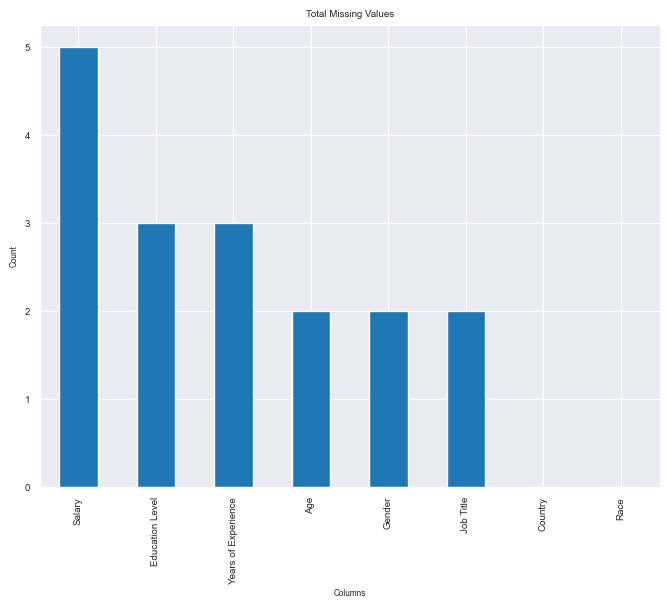

In [7]:
total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 7)

plt.xlabel("Columns", fontsize = 6)
plt.ylabel("Count", fontsize = 6)
plt.title("Total Missing Values", fontsize = 7)

#### Replace the missing values using fillna() method.

In [8]:
median = df['Salary'].median()
median
df['Salary'].fillna(median, inplace = True)
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
6698,37.0,Male,Bachelor's Degree,Junior Sales Representative,6.0,75000.0,Canada,Asian
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,UK,Mixed
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,Australia,Australian
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0,China,Chinese
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0,China,Korean


# Normalization

#### use the skew() function to calculate our skewness level of the Salary

In [9]:
print("Skewness: %f" % df['Salary'].skew())

Skewness: 0.072088


 #### In our case, we have ~0.07, so it is considered symmetrical bell curve distribution

<Axes: xlabel='Salary', ylabel='Count'>

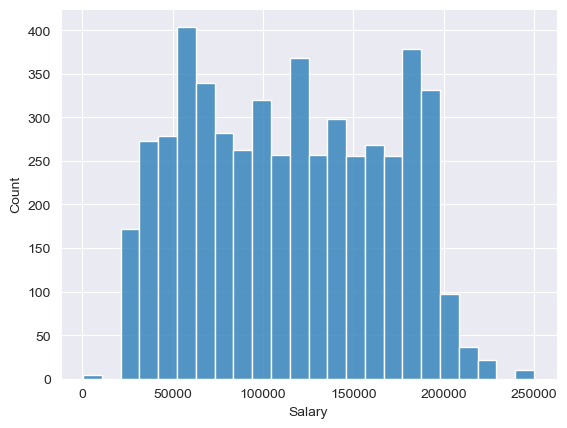

In [10]:
sns.histplot(df['Salary'])

<Axes: xlabel='Salary', ylabel='Age'>

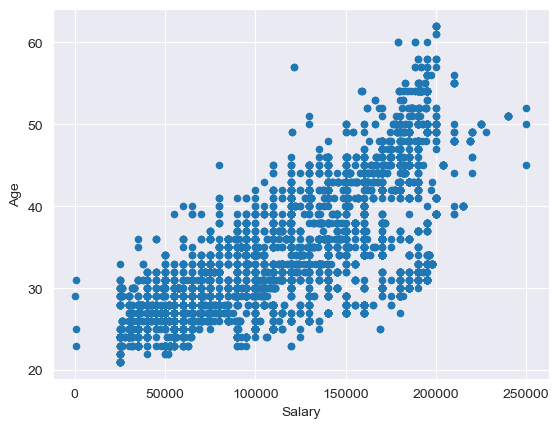

In [11]:
df.plot.scatter(x='Salary',y='Age')

# EDA Analysis

### Box plot 

<Axes: >

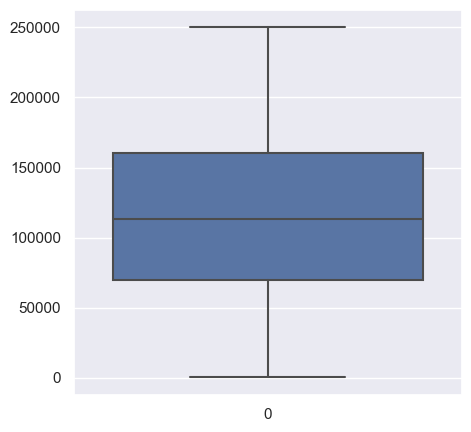

In [12]:
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot (data = df.Salary)

<Axes: >

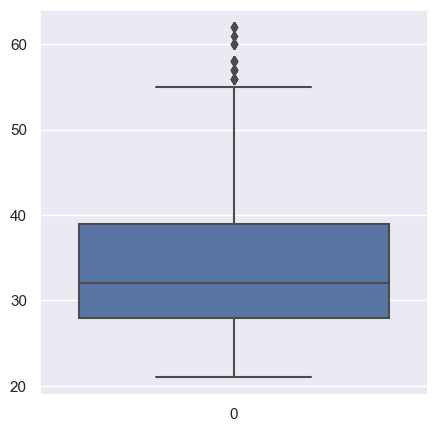

In [13]:
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot(data = df.Age)

<Axes: >

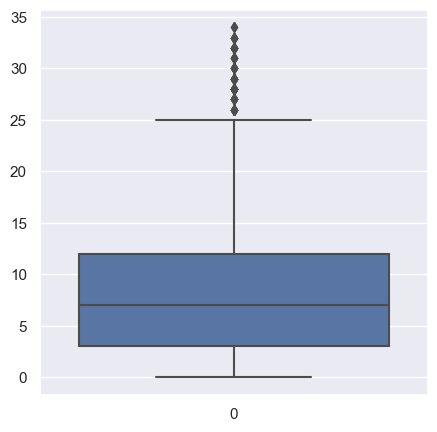

In [14]:
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot (data = df['Years of Experience'])

### Bar plot

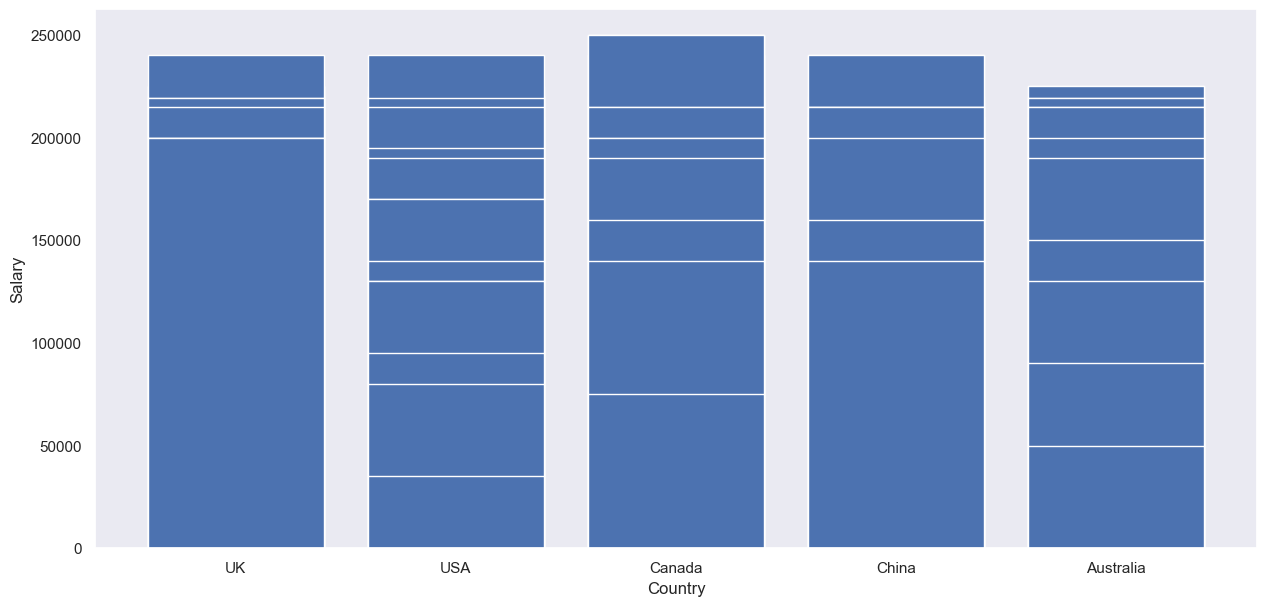

In [15]:
plt.figure(figsize=(15, 7))
plt.bar(df.Country, df.Salary)
plt.xlabel('Country')
plt.ylabel('Salary')
plt.grid()
plt.show()

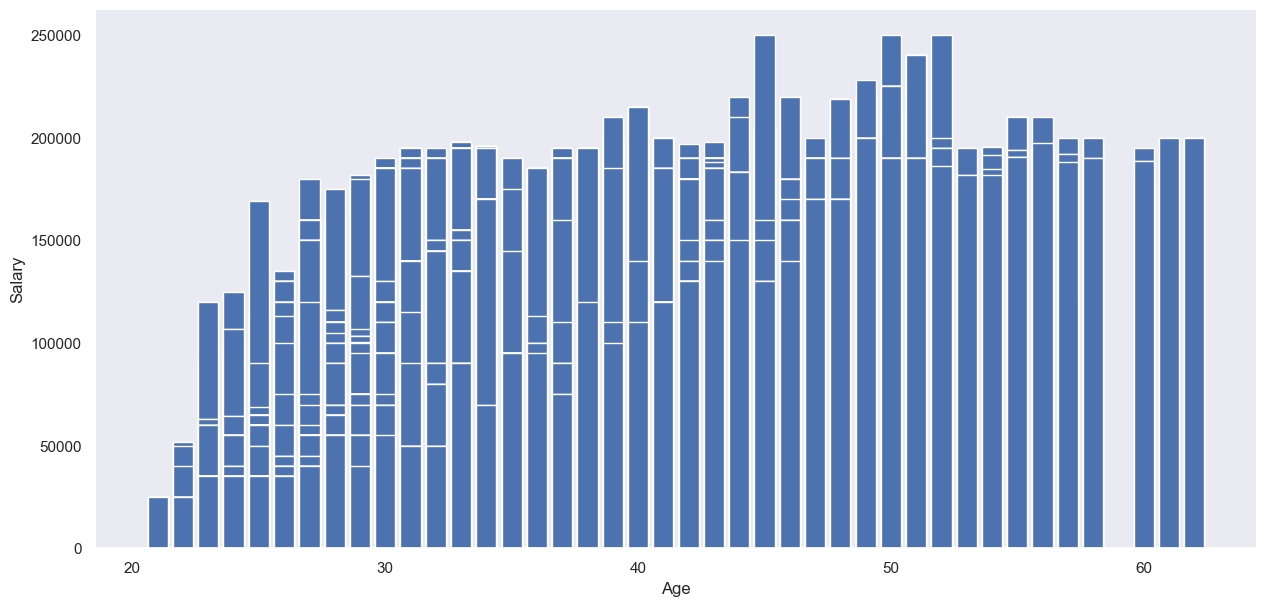

In [16]:
plt.figure(figsize=(15, 7))
plt.bar(df.Age, df.Salary)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.show()  

In [17]:
df['Gender'] = df['Gender'].values.astype('str')
df['Country'] = df['Country'].values.astype('str')
df['Education Level'] = df['Education Level'].values.astype('str')
df['Job Title'] = df['Job Title'].values.astype('str')
df['Race'] = df['Race'].values.astype('str')

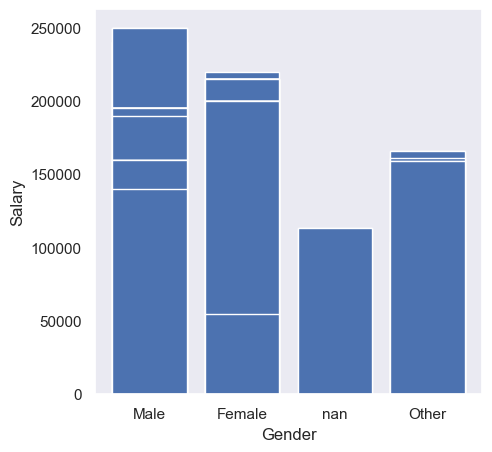

In [18]:
plt.bar(df.Gender, df.Salary)
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.grid()
plt.show()  

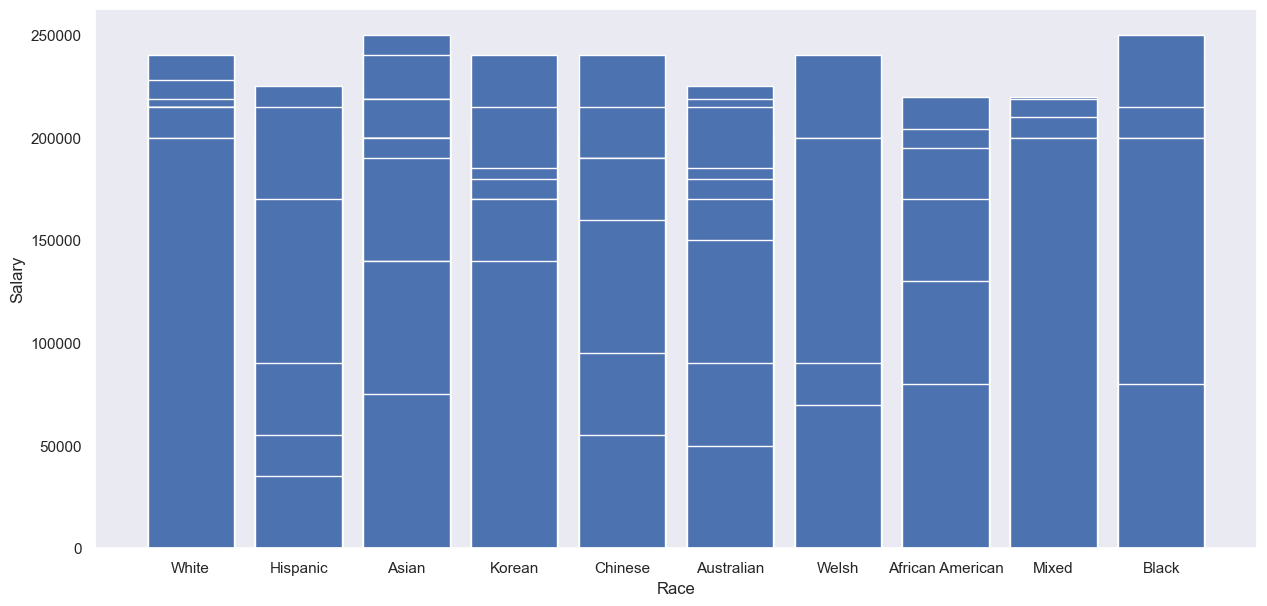

In [19]:
plt.figure(figsize=(15, 7))
plt.bar(df.Race, df.Salary)
plt.xlabel('Race')
plt.ylabel('Salary')
plt.grid()
plt.show()

### Scatter plot

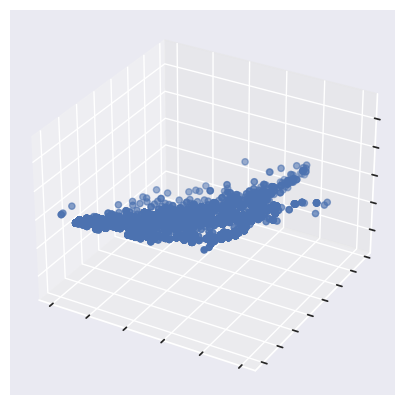

In [20]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(df.Salary, df['Years of Experience'])

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

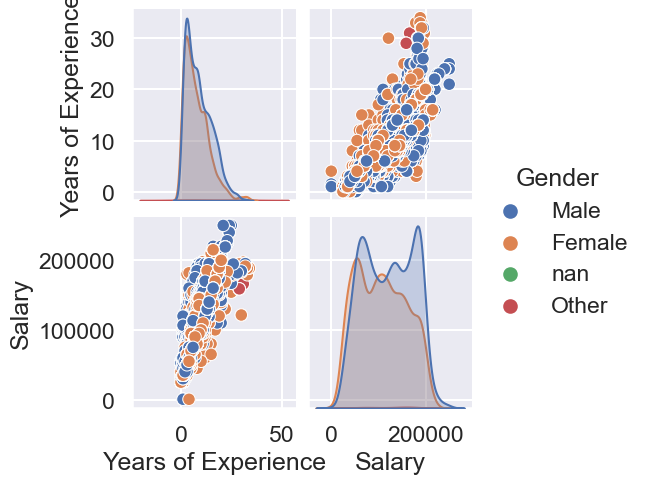

In [21]:
sns.set_context('talk')
sns.pairplot(df, vars=['Years of Experience', 'Salary'], hue='Gender')

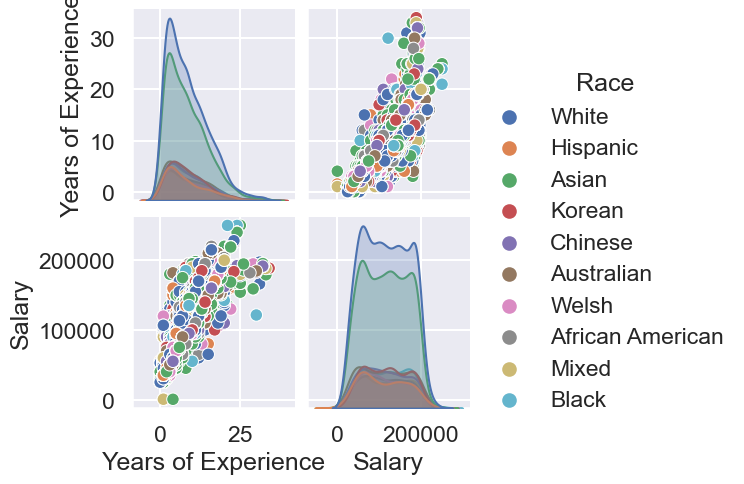

In [22]:
sns.set_context('talk')
sns.pairplot(df, vars=['Years of Experience', 'Salary'], hue='Race')

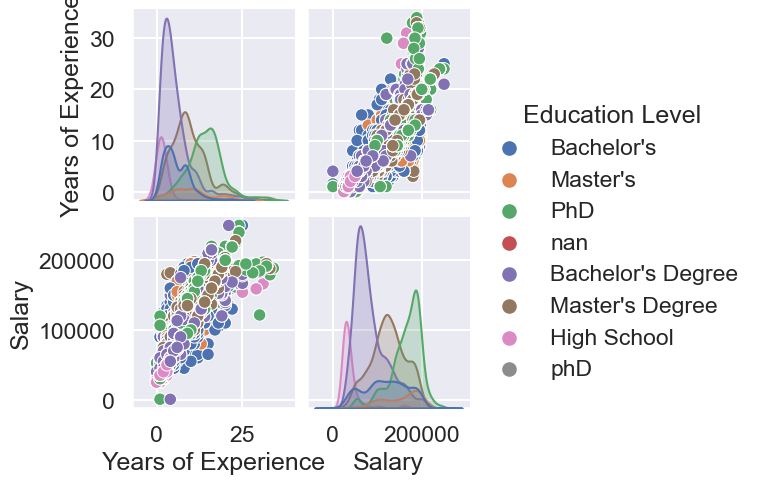

In [23]:
df['Education Level'].astype('category').cat.codes
sns.set_context('talk')
sns.pairplot(df, vars=['Years of Experience', 'Salary'], hue=('Education Level'))

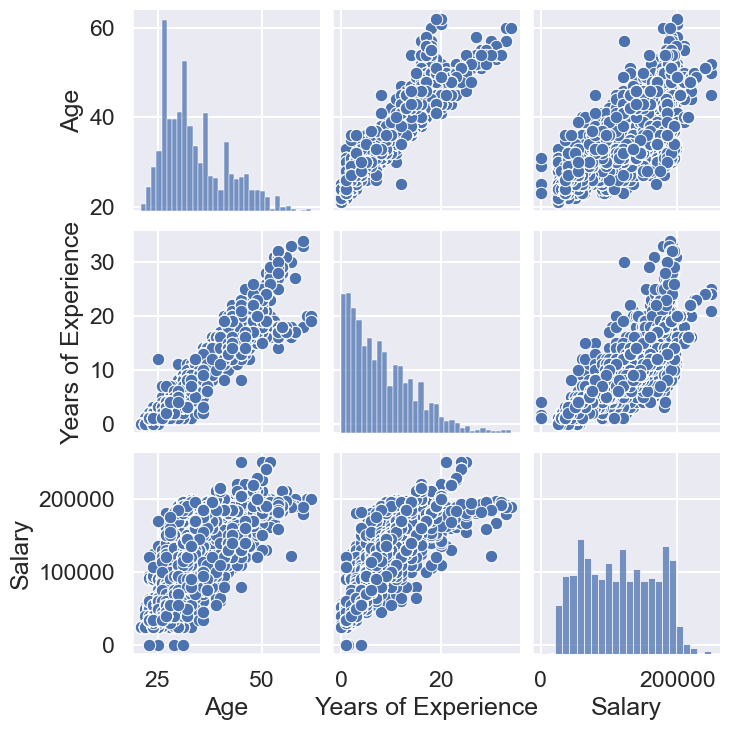

In [24]:
sns.set_context('talk')
sns.pairplot(df)

In [25]:
df['Gender']=df['Gender'].astype('category').cat.codes
df['Country']=df['Country'].astype('category').cat.codes
df['Education Level'].astype('category').cat.codes
df['Job Title']=df['Job Title'].astype('category').cat.codes
df['Race']=df['Race'].astype('category').cat.codes

In [26]:
### Multiple correlation

In [27]:
df.corr()

/var/folders/ws/v7w97xpx169_bxqt9wy1b0540000gn/T/ipykernel_18556/1886530979.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Gender,Job Title,Years of Experience,Salary,Country,Race
Age,1.000000,0.112038,0.195781,0.936778,0.742755,-0.013767,0.016412
Gender,0.112038,1.000000,0.073407,0.100317,0.129255,0.001562,-0.001872
Job Title,0.195781,0.073407,1.000000,0.163001,0.093874,-0.003417,0.014361
Years of Experience,0.936778,0.100317,0.163001,1.000000,0.814298,-0.008855,0.013353
Salary,0.742755,0.129255,0.093874,0.814298,1.000000,-0.017129,0.008657
Country,-0.013767,0.001562,-0.003417,-0.008855,-0.017129,1.000000,0.077766
Race,0.016412,-0.001872,0.014361,0.013353,0.008657,0.077766,1.000000


In [28]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['Salary'][:-1] # -1 means that the latest row is SalePrice
top_features = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with Salary:\n{}".format(len(top_features), top_features))

There is 2 strongly correlated values with Salary:
Years of Experience    0.814298
Age                    0.742755
Name: Salary, dtype: float64


#### Above, there are 2 features, with coefficients greater than 0.5, that are strongly correlated with the Salary.

/var/folders/ws/v7w97xpx169_bxqt9wy1b0540000gn/T/ipykernel_18556/2824784381.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', annot=True)


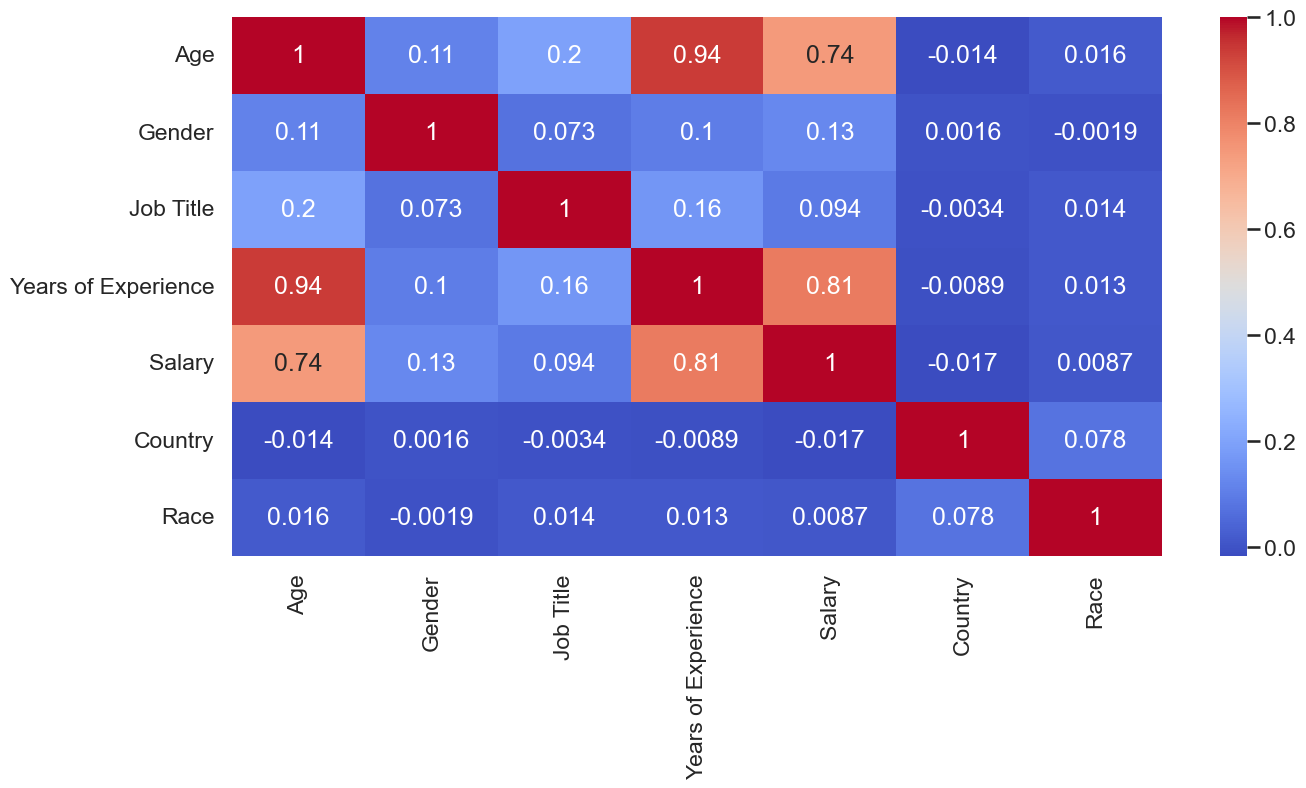

In [29]:
# Create the heatmap using the `heatmap` function of Seaborn
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

# Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
plt.show()